## Product and Retail Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
import datetime
plt.style.use('ggplot')

In [176]:
df=pd.read_excel('OnlineRetail.xlsx')#,encoding = 'ISO-8859-1')

In [177]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB


In [179]:
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

In [180]:
df_no_miss=df.dropna()
df_no_miss.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [181]:
df_no_miss['CustomerID']=df_no_miss['CustomerID'].astype('int64')

In [182]:
df2=df_no_miss.copy()

In [183]:
df2.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.0,12.06,248.69,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,406829.0,3.46,69.32,0.0,1.25,1.95,3.75,38970.0
CustomerID,406829.0,15287.69,1713.60,12346.0,13953.00,15152.00,16791.00,18287.0


Observations
1. minimum quantity in negative
2. Quantity has outliers towards both sides.
3. Min. unitprice is 0- Not Possible
4. Mean Quantity is 12

<AxesSubplot:xlabel='Quantity'>

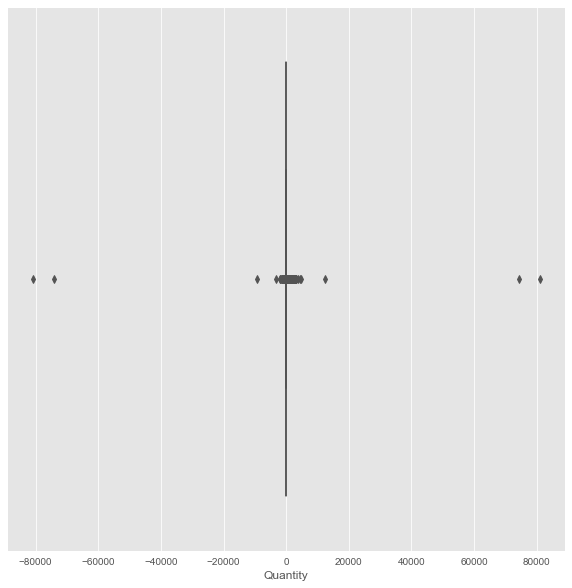

In [184]:
plt.figure(figsize=(10,10))
sns.boxplot(df2['Quantity'])

One way is to remove negative values
But we will not remove values instead will make then +ve

In [185]:
df2['Quantity']=df2['Quantity'].apply(abs)

<AxesSubplot:xlabel='UnitPrice'>

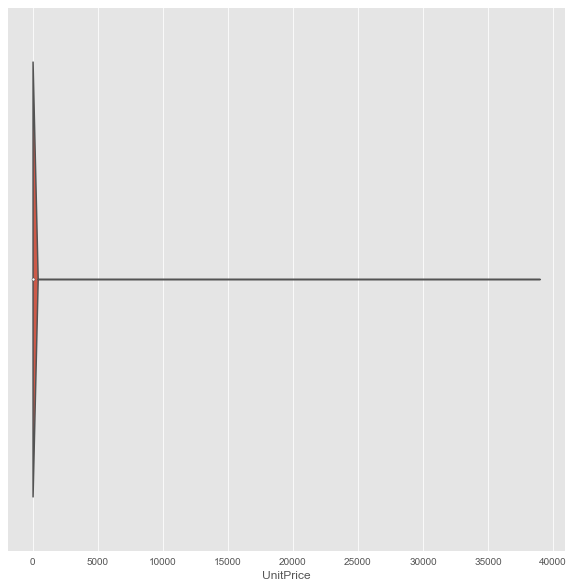

In [186]:
plt.figure(figsize=(10,10))
sns.violinplot(df2['UnitPrice'])

New Feature creation - Amount Spent

In [187]:
df2['AmountSpent']=df2['Quantity']*df2['UnitPrice']

In [188]:
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [189]:
df2['month_year']=df2['InvoiceDate'].dt.to_period('M')

In [190]:
for i in ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter']:
    df2[i]=getattr(df2['InvoiceDate'].dt,i)

In [191]:
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,2,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,2,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4


In [192]:
df2.dayofweek=df2.dayofweek+1

In [193]:
df2.weekofyear.value_counts().sort_values(ascending=False)[0:15]

48    21763
49    21318
46    16320
47    15245
45    14758
44    13393
43    12441
40    12233
42    11790
38    11079
41    10970
39    10316
37     8744
36     8240
20     7816
Name: weekofyear, dtype: int64

From Week 47 to 49 the sales are high

In [194]:
dof=df2.dayofweek.value_counts().sort_values(ascending=False).reset_index()
dof

,index,dayofweek
0,4,82374
1,3,70599
2,2,68110
3,1,66382
4,7,63237
5,5,56127


<AxesSubplot:xlabel='index', ylabel='dayofweek'>

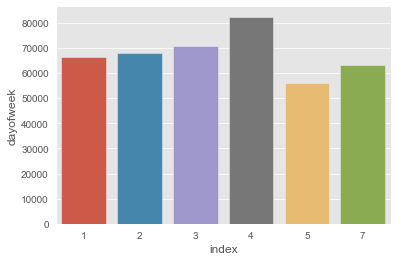

In [195]:
sns.barplot(dof['index'],dof['dayofweek'])


Most of the orders happened on Thursday

In [196]:
df2.dayofyear.value_counts().sort_values(ascending=False)[0:20]

339    6122
340    4628
342    4620
335    4194
336    4062
310    3434
327    3332
341    3329
314    3194
324    3112
321    3034
318    2964
303    2907
279    2870
326    2862
332    2789
283    2783
320    2772
317    2757
333    2736
Name: dayofyear, dtype: int64

In [197]:
sp_year=df2.groupby('Country')['AmountSpent'].sum().sort_values(ascending=False).reset_index()
sp_year.head()

,Country,AmountSpent
0,United Kingdom,7.848910e+06
1,Netherlands,2.862311e+05
2,EIRE,2.808066e+05
3,Germany,2.360361e+05
4,France,2.213353e+05


In [198]:
sales_per_cust=df2.groupby(['Country','CustomerID'])['InvoiceNo'].count().sort_values(ascending=False).reset_index()
sales_per_cust.columns=['Country','CustomerID','NoOfSales']
sales_per_cust.head(10)

,Country,CustomerID,NoOfSales
0,United Kingdom,17841,7983
1,EIRE,14911,5903
2,United Kingdom,14096,5128
3,United Kingdom,12748,4642
4,United Kingdom,14606,2782
5,United Kingdom,15311,2491
6,Netherlands,14646,2085
7,United Kingdom,13089,1857
8,United Kingdom,13263,1677
9,United Kingdom,14298,1640


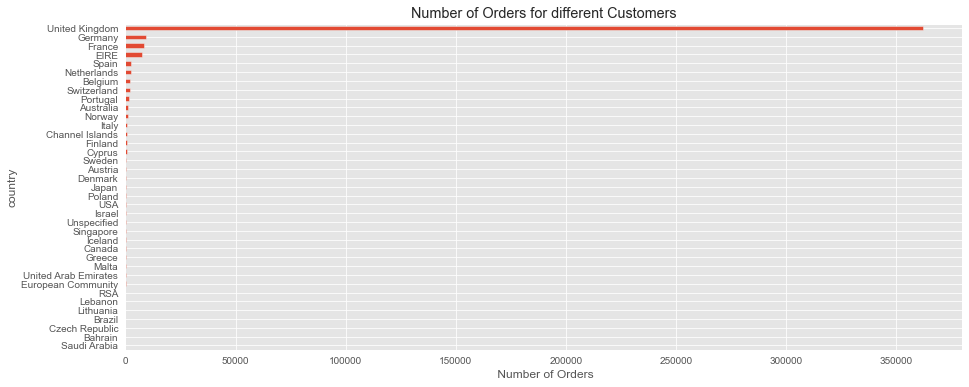

In [199]:

orders = df2.groupby('Country')['InvoiceDate'].count().sort_values()

plt.subplots(figsize=(15,6))
orders.plot(kind='barh')
plt.xlabel(' Number of Orders')
plt.ylabel('country')
plt.title('Number of Orders for different Customers')
plt.show()

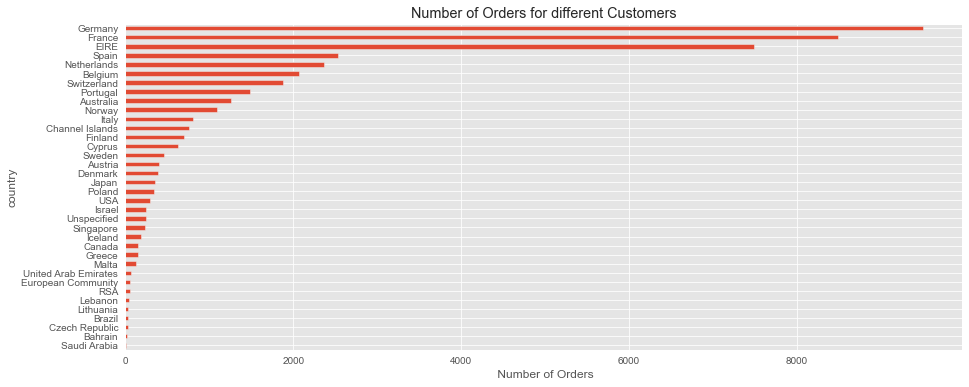

In [200]:

orders = df2.groupby('Country')['InvoiceDate'].count().sort_values()
del orders['United Kingdom']
plt.subplots(figsize=(15,6))
orders.plot(kind='barh')
plt.xlabel(' Number of Orders')
plt.ylabel('country')
plt.title('Number of Orders for different Customers')
plt.show()

Out of top 10 customers 8 are from UK

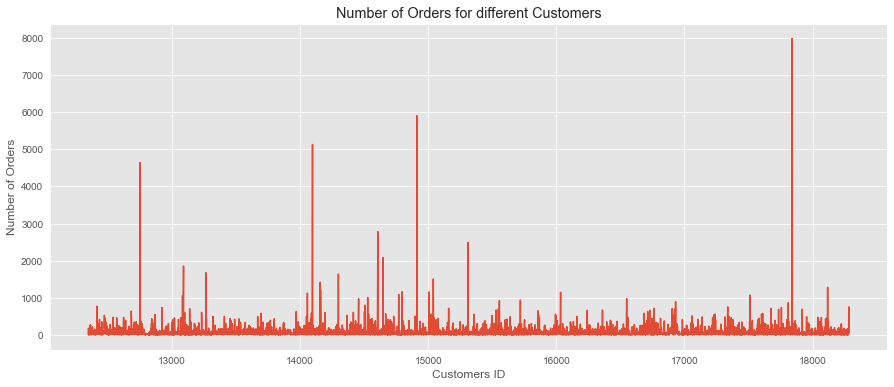

In [201]:
# Visualizing No. of Sales for all Customers

orders = df2.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

In [202]:
df2.year.unique()

array([2010, 2011], dtype=int64)

In [203]:
df2['hour']=df2.InvoiceDate.dt.hour

In [204]:
df2['year_month']=df2.InvoiceDate.dt.year*100+df2.InvoiceDate.dt.month

In [205]:
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,weekofyear,quarter,hour,year_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,3,335,48,4,8,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4,8,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,3,335,48,4,8,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4,8,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4,8,201012


<AxesSubplot:xlabel='hour', ylabel='count'>

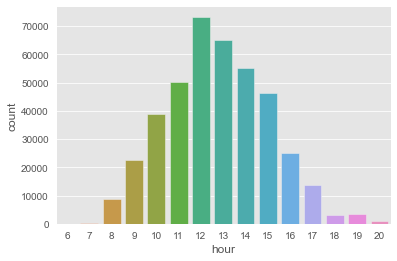

In [206]:
cnt_hr=df2.groupby('hour')['InvoiceNo'].count().reset_index().sort_values(by='InvoiceNo',ascending=False)
cnt_hr.columns=['hour','count']

sns.barplot(cnt_hr['hour'],cnt_hr['count'])

<AxesSubplot:xlabel='weekofyear', ylabel='count'>

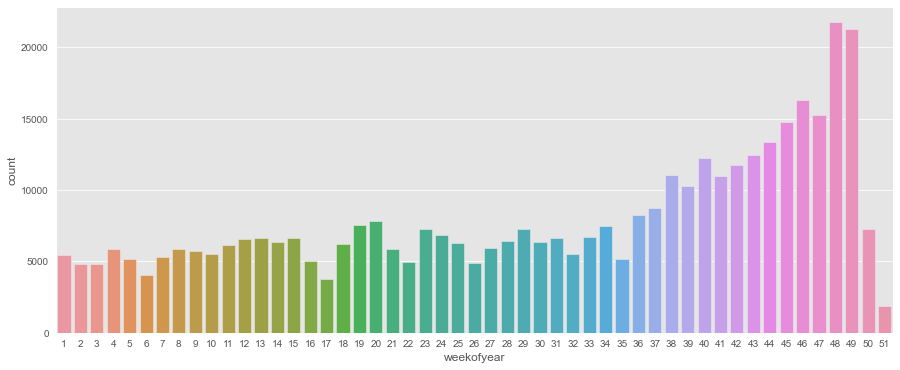

In [207]:
cnt_hr=df2.groupby('weekofyear')['InvoiceNo'].count().reset_index().sort_values(by='InvoiceNo',ascending=False)
cnt_hr.columns=['weekofyear','count']
plt.figure(figsize=(15,6))
sns.barplot(cnt_hr['weekofyear'],cnt_hr['count'])

In [208]:
df2 = df2.loc[df2['InvoiceDate'] < '2011-12-01']

In [209]:
invoice_cs_df=df2.groupby(by=['InvoiceNo','InvoiceDate']).agg({'AmountSpent':sum,'CustomerID':max,'Country':max}).reset_index().sort_values('AmountSpent',ascending=False)

In [213]:
invoice_cs_df.head(10)

,InvoiceNo,InvoiceDate,AmountSpent,CustomerID,Country
18210,C541433,2011-01-18 10:17:00,77183.60,12346,United Kingdom
1911,541431,2011-01-18 10:01:00,77183.60,12346,United Kingdom
7949,556444,2011-06-10 15:28:00,38970.00,15098,United Kingdom
19490,C556445,2011-06-10 15:31:00,38970.00,15098,United Kingdom
12446,567423,2011-09-20 11:05:00,31698.16,17450,United Kingdom
18997,C550456,2011-04-18 13:08:00,22998.40,15749,United Kingdom
8135,556917,2011-06-15 13:37:00,22775.93,12415,Australia
14487,572209,2011-10-21 12:08:00,22206.00,18102,United Kingdom
12438,567381,2011-09-20 10:12:00,22104.80,17450,United Kingdom
10869,563614,2011-08-18 08:51:00,21880.44,12415,Australia


In [242]:
invoice_cs = invoice_cs_df.set_index('InvoiceDate').groupby(
            'CustomerID' ).count().reset_index()
invoice_cs[invoice_cs.InvoiceNo>1].sort_values('InvoiceNo',ascending=False).reset_index().head(10)


,index,CustomerID,InvoiceNo,AmountSpent,Country
0,1876,14911,239,239,239
1,323,12748,216,216,216
2,4006,17841,165,165,165
3,1656,14606,128,128,128
4,560,13089,114,114,114
5,2171,15311,113,113,113
6,480,12971,87,87,87
7,1599,14527,83,83,83
8,793,13408,77,77,77
9,2693,16029,76,76,76


In [283]:
monthly_repeat_customers_df = invoice_cs_df.set_index('InvoiceDate').groupby([
  pd.Grouper(freq='M'), 'CustomerID']).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']

monthly_repeat_customers_df

InvoiceDate
2010-12-31    357
2011-01-31    256
2011-02-28    246
2011-03-31    323
2011-04-30    271
2011-05-31    398
2011-06-30    333
2011-07-31    327
2011-08-31    299
2011-09-30    400
2011-10-31    446
2011-11-30    674
Freq: M, Name: CustomerID, dtype: int64

In [284]:
# Number of Unique customers per month
monthly_unique_customers_df = df2.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()
monthly_unique_customers_df

InvoiceDate
2010-12-31     948
2011-01-31     783
2011-02-28     798
2011-03-31    1020
2011-04-30     899
2011-05-31    1079
2011-06-30    1051
2011-07-31     993
2011-08-31     980
2011-09-30    1302
2011-10-31    1425
2011-11-30    1711
Freq: M, Name: CustomerID, dtype: int64

In [285]:
# Ratio of Repeat to Unique customers
monthly_repeat_percentage = monthly_repeat_customers_df/monthly_unique_customers_df*100.0
monthly_repeat_percentage

InvoiceDate
2010-12-31    37.658228
2011-01-31    32.694764
2011-02-28    30.827068
2011-03-31    31.666667
2011-04-30    30.144605
2011-05-31    36.886006
2011-06-30    31.684110
2011-07-31    32.930514
2011-08-31    30.510204
2011-09-30    30.721966
2011-10-31    31.298246
2011-11-30    39.392168
Freq: M, Name: CustomerID, dtype: float64

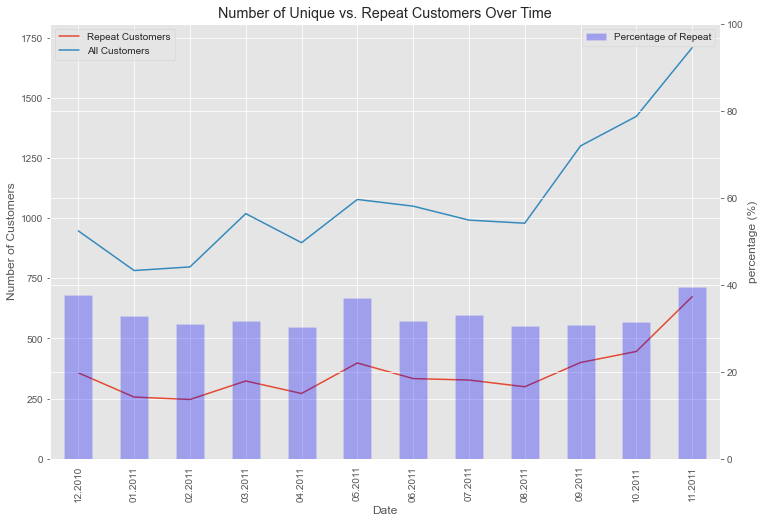

In [287]:
# Plotting this visually
# Note we're using a 2 scale y axis (left and right)

ax = pd.DataFrame(monthly_repeat_customers_df.values).plot(figsize=(12,8))

pd.DataFrame(monthly_unique_customers_df.values).plot(ax=ax,grid=True)

ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(ax=ax,grid=True,secondary_y=True,color='blue',alpha=0.3)

ax.set_xlabel('Date')
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Unique vs. Repeat Customers Over Time')

ax2.set_ylabel('percentage (%)')

ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')

ax.set_ylim([0, monthly_unique_customers_df.values.max()+100])
ax2.set_ylim([0, 100])

plt.xticks(range(len(monthly_repeat_customers_df.index)), [x.strftime('%m.%Y') for x in monthly_repeat_customers_df.index], rotation=45)

plt.show()

In [289]:

invoice_customer_df = df2.groupby(by=['InvoiceNo', 'InvoiceDate']).agg({'AmountSpent': sum, 'CustomerID': max,'Country': max,}).reset_index()
invoice_customer_df.head()

,InvoiceNo,InvoiceDate,AmountSpent,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047,United Kingdom


In [290]:

monthly_revenue_df = df2.set_index('InvoiceDate')['AmountSpent'].resample('M').sum()

monthly_rev_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID']).filter(lambda x: len(x) > 1).resample('M').sum()['AmountSpent']


monthly_rev_perc_repeat_customers_df = monthly_rev_repeat_customers_df/monthly_revenue_df * 100.0
monthly_rev_perc_repeat_customers_df

InvoiceDate
2010-12-31    69.515652
2011-01-31    66.734220
2011-02-28    52.059945
2011-03-31    58.034985
2011-04-30    58.369834
2011-05-31    65.500197
2011-06-30    66.798166
2011-07-31    60.492862
2011-08-31    59.689721
2011-09-30    61.032815
2011-10-31    63.773641
2011-11-30    67.310633
Freq: M, Name: AmountSpent, dtype: float64

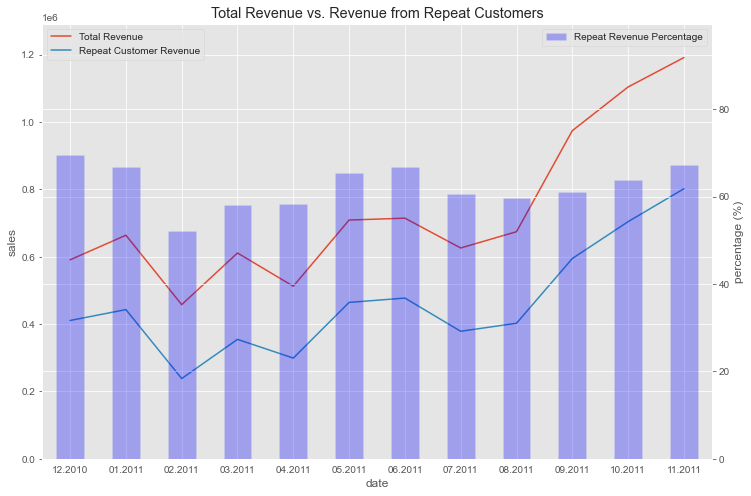

In [291]:
# Now let's plot this information we obtained above
ax = pd.DataFrame(monthly_revenue_df.values).plot(figsize=(12,8))

pd.DataFrame(monthly_rev_repeat_customers_df.values).plot(ax=ax,grid=True,)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue vs. Revenue from Repeat Customers')

ax.legend(['Total Revenue', 'Repeat Customer Revenue'])

ax.set_ylim([0, max(monthly_revenue_df.values)+100000])

ax2 = ax.twinx()

pd.DataFrame(monthly_rev_perc_repeat_customers_df.values).plot(ax=ax2,kind='bar',color='blue',alpha=0.3)

ax2.set_ylim([0, max(monthly_rev_perc_repeat_customers_df.values)+30])
ax2.set_ylabel('percentage (%)')
ax2.legend(['Repeat Revenue Percentage'])

ax2.set_xticklabels([x.strftime('%m.%Y') for x in monthly_rev_perc_repeat_customers_df.index])

plt.show()